# Logical indexing in Pandas
Duncan Callaway

In [1]:
import pandas as pd

### Logical indexing
Logical indexing is an extremely powerful way to pull data out of a frame.  
For example, with the stacked data frame, let's pull out only wind generation.

To get started we're going to work with a different data set.  Same as before, but the values are "stacked", as you can see here:

In [2]:
caiso_data_stack = pd.read_csv('CAISO_2017to2018_stack.csv', index_col=0)
caiso_data_stack.head()

,Source,MWh
2017-08-29 00:00:00,GEOTHERMAL,1181
2017-08-29 00:00:00,BIOMASS,340
2017-08-29 00:00:00,BIOGAS,156
2017-08-29 00:00:00,SMALL HYDRO,324
2017-08-29 00:00:00,WIND TOTAL,1551


Note that I used the argument `index_col` to tell pandas to use column 1 (its index is 0) as the index.

First, I'll show you a boolean series based on comparisons to the 'Source' data column:

In [4]:
wind_indx = (caiso_data_stack['Source']=='WIND TOTAL')
wind_indx

2017-08-29 00:00:00    False
2017-08-29 00:00:00    False
2017-08-29 00:00:00    False
2017-08-29 00:00:00    False
2017-08-29 00:00:00     True
                       ...  
2018-08-28 23:00:00    False
2018-08-28 23:00:00    False
2018-08-28 23:00:00     True
2018-08-28 23:00:00    False
2018-08-28 23:00:00    False
Name: Source, Length: 61320, dtype: bool

Now we can embed that inside the `.loc` method:

In [5]:
caiso_data_stack.loc[wind_indx,:]

,Source,MWh
2017-08-29 00:00:00,WIND TOTAL,1551
2017-08-29 01:00:00,WIND TOTAL,1556
2017-08-29 02:00:00,WIND TOTAL,1325
2017-08-29 03:00:00,WIND TOTAL,1158
2017-08-29 04:00:00,WIND TOTAL,1209
...,...,...
2018-08-28 19:00:00,WIND TOTAL,3300
2018-08-28 20:00:00,WIND TOTAL,3468
2018-08-28 21:00:00,WIND TOTAL,3310
2018-08-28 22:00:00,WIND TOTAL,3068


## Q: What hour in our data has the lowest average hourly wind generation?

First let's import numpy

In [6]:
import numpy as np

Now let's grab just the wind data:

In [8]:
wind = caiso_data_stack.loc[caiso_data_stack['Source']=='WIND TOTAL',:]

Let's use a for loop to get information by hour. 

First thing to do is figure out how to get the hour out of the index.

[`datetime.strptime`](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior) is useful for this if you're working on individual dates.

But `pd.to_datetime` is even better, especially if you're working on a lot of values in a list (or as the case will be, values in a pandas series).

In [9]:
windex = pd.to_datetime(wind.index)
windex.hour

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype='int32', length=8760)

Now we'll do the real work.  We're going to average all wind values with the same hour

In [10]:
wind_ave = [] # initalizes a list to populate

for i in range(0,24):
    hr_bool = windex.hour == i
    hr_vals = wind.loc[hr_bool,'MWh']
    avgwind = np.mean(hr_vals)
    wind_ave.append(avgwind)
wind_ave

[2173.268493150685,
 2120.778082191781,
 2051.832876712329,
 1973.9698630136986,
 1881.4630136986302,
 1772.4849315068493,
 1646.6301369863013,
 1490.194520547945,
 1363.4027397260274,
 1290.5123287671233,
 1250.4082191780822,
 1247.6438356164383,
 1308.2876712328766,
 1412.4109589041095,
 1561.6027397260275,
 1726.6520547945206,
 1878.441095890411,
 2005.9342465753425,
 2109.0931506849315,
 2181.3616438356166,
 2229.408219178082,
 2231.6876712328767,
 2220.109589041096,
 2216.5260273972603]

In [11]:
import matplotlib.pyplot as plt

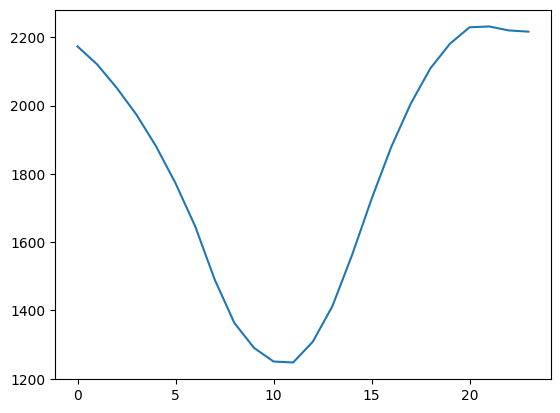

In [12]:
plt.plot(wind_ave)

We can see pretty clearly that the min is 10 or 11...let's dig a little more.

One way to do this is to drop the data into a data frame and then *sort* the data frame.

In [13]:
df_wind = pd.DataFrame(wind_ave)
df_wind

,0
0,2173.268493
1,2120.778082
2,2051.832877
3,1973.969863
4,1881.463014
5,1772.484932
6,1646.630137
7,1490.194521
8,1363.402740
9,1290.512329


I'm going to be adding more MWh values to the data frame in just a moment, so let's be clear that this is the average

In [14]:
df_wind.columns = ['Average MWh']

In [15]:
df_wind.sort_values(by='Average MWh',ascending=True).head()

,Average MWh
11,1247.643836
10,1250.408219
9,1290.512329
12,1308.287671
8,1363.402740


Ok -- so it looks as though mid-day is the minimum *average*.  

### Extra practice: What's the range of wind values by hour?

In [16]:
wind_min = [] # initalizes a list to populate
wind_max = [] # initalizes a list to populate
for i in range(0,24):
    wind_min.append(np.min(wind.loc[windex.hour == i,'MWh']))
    wind_max.append(np.max(wind.loc[windex.hour == i,'MWh']))

In [17]:
wind_min

[49,
 33,
 33,
 36,
 25,
 17,
 15,
 29,
 6,
 10,
 10,
 8,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 18,
 62]

In [18]:
df_wind['min MWh']=pd.DataFrame(wind_min)
df_wind['max MWh']=pd.DataFrame(wind_max)

In [19]:
df_wind

,Average MWh,min MWh,max MWh
0,2173.268493,49,4795
1,2120.778082,33,4678
2,2051.832877,33,4696
3,1973.969863,36,4537
4,1881.463014,25,4377
5,1772.484932,17,4223
6,1646.630137,15,4161
7,1490.194521,29,3873
8,1363.402740,6,3905
9,1290.512329,10,3904


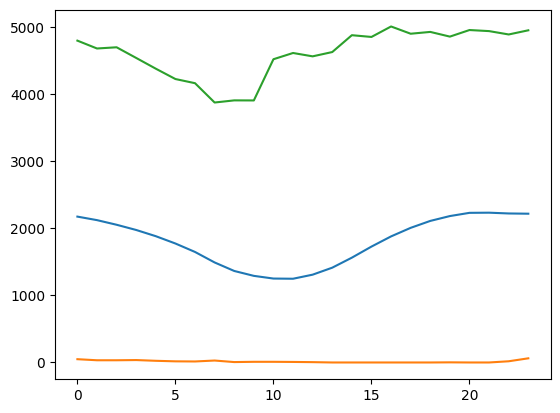

In [20]:
plt.plot(df_wind)